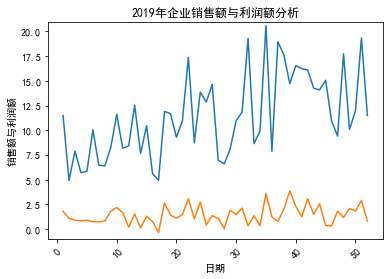

In [3]:
# -*- coding: utf-8 -*-

#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

import matplotlib.pyplot as plt
import pymysql
plt.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号


#连接Hadoop数据库
v1 = []
v2 = []
v3 = []

conn = pymysql.connect(host='lylg102',port=3306,user='root',password='000000',db='test',charset='utf8')
cursor = conn.cursor()
#读取MySQL数据


#读取Hadoop订单表数据
sql_num = "SELECT weekofyear(order_date),ROUND(SUM(sales)/10000,2),ROUND(SUM(profit)/10000,2) FROM orders WHERE dt=2019 GROUP BY weekofyear(order_date)"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])
    v3.append(s[2]) 

#print(v1)
#print(v2)
#print(v3)
    
#画折线图
plt.plot(v1, v2)
plt.plot(v1, v3)
#设置纵坐标范围
plt.ylim((-1,21))
#设置横坐标角度，这里设置为45度
plt.xticks(rotation=45)
#设置横纵坐标名称
plt.xlabel("日期")
plt.ylabel("销售额与利润额")
#设置折线图名称
plt.title("2019年企业销售额与利润额分析")
plt.show()